In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Question 1
### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [54]:
df = pd.read_csv("Data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [55]:
#Checking data frame size
df.shape 

(5000, 7)

In [56]:
#Checking data types of data frame
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [57]:
#Checking for null values in the data
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [58]:
#Getting an overview of the data
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

**a)** It seems that one of the reasons for the unusually high average order value (AOV) could be the fact that some of the order data is incorrect. The max price of the order_amount is 704000, which is very high and likely to be wrong. A better way to analyse AOV would be to calculate the AOV for eacch individual store so that we are able to compare store to store and also see if there are any stores with unusually high AOV.

In [59]:
#Converting created_at column into datetime object type.
df.created_at = pd.to_datetime(df.created_at)

In [43]:
#Calculating the AOV and sorting by highest to lowest
df.groupby(df.shop_id).order_amount.mean().sort_values(ascending=False)

shop_id
42     235101.490196
78      49213.043478
50        403.545455
90        403.224490
38        390.857143
           ...      
53        214.117647
100       213.675000
32        189.976190
2         174.327273
92        162.857143
Name: order_amount, Length: 100, dtype: float64

From this we can see that shops 42 and 78 seem to have unusually large AOV so we want to examine the orders from those stores closer.

In [44]:
df[df.shop_id == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


We can see that there are multiple orders for \$704000 with 2000 items by user_id 607. This may not necessarily be wrong because there may be a bulk order but it is suspicious. To check further, we can look at the total_items column of the data to see the range of values.

In [61]:
df.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

After examining this we can see that an order size of 2000 is very abnormal and in this case I would remove these values from the data set for our analysis.

In [46]:
df = df[df.user_id != 607]

In [47]:
df.groupby(df.shop_id).order_amount.mean().sort_values(ascending=False)

shop_id
78     49213.043478
42       652.235294
50       403.545455
90       403.224490
38       390.857143
           ...     
53       214.117647
100      213.675000
32       189.976190
2        174.327273
92       162.857143
Name: order_amount, Length: 100, dtype: float64

Another check shows that the AOV for store 42 has gone down to a realistic number, now lets fix store 78.

In [48]:
df[df.shop_id == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20


We can see that the total_items column seems to look reasonable, unlike in store 42, so there might be a mistake in the input in the order_amount. I am going to assume that the person inputing the data may have forgotten the decimal place, but I cannot be completely sure, this would explain why the numbers are unusually large but are still multiples of each other. For the purpose of this task, if we divide the values by 100 we should be able to calculate a reasonable AOV.

In [49]:
#Add decimal place
replace = df[df.shop_id == 78].order_amount/100

In [50]:
df.loc[replace.index, 'order_amount'] = replace

In [51]:
AOV = df.groupby(df.shop_id).order_amount.mean().sort_values(ascending=False)
AOV

shop_id
42     652.235294
78     492.130435
50     403.545455
90     403.224490
38     390.857143
          ...    
53     214.117647
100    213.675000
32     189.976190
2      174.327273
92     162.857143
Name: order_amount, Length: 100, dtype: float64

now all our AOV values look reasonable

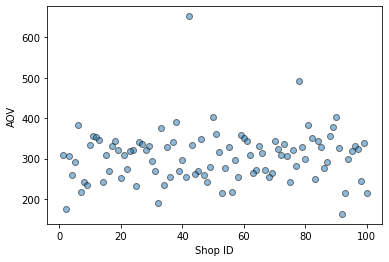

In [52]:
_ = plt.scatter(AOV.index, AOV, alpha=0.5, edgecolor='k')
_ = plt.xlabel('Shop ID')
_ = plt.ylabel('AOV')

A quick plot shows us that most of the stores are between 150-400 AOV with the exception of 2 outliers.

**b)** We have calculated the AOV for the data set by store, i feel like this is the best metric because you can easily see which stores are doing better or worse and identify any outliers.

**c)** Outputting AOV per store to csv

In [65]:
AOV.to_csv("AOV.csv")